In [1]:
import numpy as np
import pyvisa
import matplotlib.pyplot as plt

In [4]:
rm = pyvisa.ResourceManager()
instr = rm.open_resource('COM15')
instr.baud_raute = 115200
instr.read()

VisaIOError: VI_ERROR_TMO (-1073807339): Timeout expired before operation completed.

In [44]:
from scipy.optimize import curve_fit

1.7483e+05 samples per second


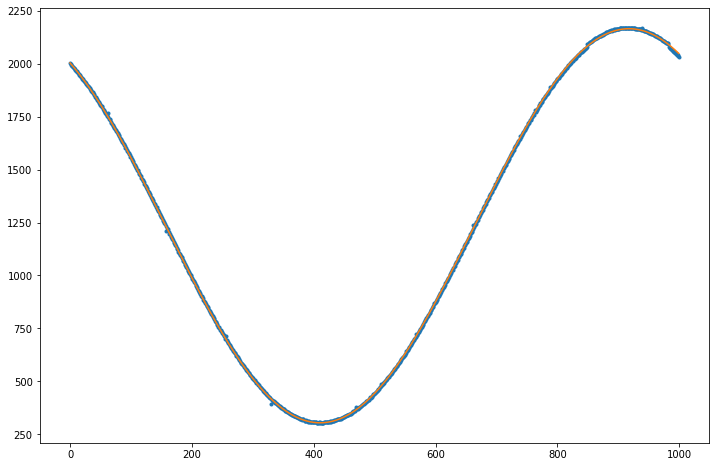

In [90]:
instr.write('1')
data = np.frombuffer(instr.read_bytes(2000), np.int16)

ffunc = lambda x,w,a,b,c: a*np.sin(2*np.pi*x*w+b)+c
x = np.arange(0,len(data),1)
popt, pcov = curve_fit(ffunc, x, data, p0 = (1,1000,0,1000))

fig, ax = plt.subplots(figsize = (12,8))
ax.plot(x, data, '.')
ax.plot(x, ffunc(x, *popt))
print(f'{1/(popt[0]/175/1000):.4e} samples per second')

In [88]:
popt

array([ 1.00141490e+00,  9.28832760e+02, -3.74250355e+00,  1.23109822e+03])